In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import fnmatch
import os

pd.set_option('display.max_columns', 500)

C:\Users\19012\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
tackle = pd.read_csv('C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tackles.csv')
games = pd.read_csv('C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/games.csv')
players = pd.read_csv('C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/players.csv')
plays = pd.read_csv('C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/plays.csv')
# tracking = pd.read_csv('C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_1.csv')

In [3]:
# load in the weekly tracking data
tracking = pd.DataFrame()
directory = 'C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if fnmatch.fnmatch(f, '*week*.csv'):
        print(f)
        week = pd.read_csv(f)
        #tracking = tracking.append(week,ignore_index=True)
        tracking = pd.concat([tracking, week], ignore_index=True)

C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_1.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_2.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_3.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_4.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_5.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_6.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_7.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_8.csv
C:/Users/19012/Documents/BDB 2024/nfl-big-data-bowl-2024/tracking_week_9.csv


In [4]:
tackle.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [5]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [6]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [7]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [8]:
tracking.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [9]:
tracking.event.unique()

array([nan, 'pass_arrived', 'pass_outcome_caught', 'tackle', 'run',
       'first_contact', 'ball_snap', 'handoff', 'touchdown',
       'out_of_bounds', 'man_in_motion', 'fumble', 'play_action',
       'pass_forward', 'lateral', 'autoevent_passforward',
       'autoevent_passinterrupted', 'line_set', 'qb_slide', 'shift',
       'run_pass_option', 'qb_sack', 'pass_shovel', 'autoevent_ballsnap',
       'snap_direct', 'fumble_defense_recovered',
       'fumble_offense_recovered', 'penalty_flag', 'safety',
       'pass_outcome_touchdown', 'penalty_accepted'], dtype=object)

In [10]:
# aaron donald tackle that we can use as an example
tracking[(tracking['gameId']==2022090800) & (tracking['event']=='tackle') & (tracking['nflId']==41239)]# & (week1['playId']==56)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
61,2022090800,56,41239.0,Aaron Donald,18,2022-09-08 20:24:06.900000,99.0,LA,left,91.04,27.66,2.16,1.98,0.22,273.18,263.65,tackle
591,2022090800,80,41239.0,Aaron Donald,26,2022-09-08 20:24:38.200000,99.0,LA,left,86.39,32.39,2.29,1.32,0.24,329.42,313.32,tackle
1338,2022090800,101,41239.0,Aaron Donald,45,2022-09-08 20:25:12.599999,99.0,LA,left,76.26,39.77,2.89,2.61,0.31,354.54,36.88,tackle
2417,2022090800,122,41239.0,Aaron Donald,29,2022-09-08 20:25:53.799999,99.0,LA,left,60.13,45.09,5.77,3.46,0.60,351.44,300.66,tackle
3245,2022090800,146,41239.0,Aaron Donald,52,2022-09-08 20:26:34.500000,99.0,LA,left,57.94,24.64,1.39,0.94,0.15,210.32,182.02,tackle
4431,2022090800,167,41239.0,Aaron Donald,18,2022-09-08 20:27:12.099999,99.0,LA,left,64.02,28.12,1.58,2.30,0.16,294.49,331.32,tackle
5024,2022090800,191,41239.0,Aaron Donald,47,2022-09-08 20:27:46.700000,99.0,LA,left,42.66,36.46,1.46,1.68,0.15,337.71,338.33,tackle
6092,2022090800,212,41239.0,Aaron Donald,12,2022-09-08 20:28:26.799999,99.0,LA,left,38.52,31.37,2.19,1.50,0.23,336.13,310.57,tackle
12991,2022090800,529,41239.0,Aaron Donald,50,2022-09-08 20:41:41.400000,99.0,LA,left,101.75,32.91,0.65,0.67,0.07,286.00,303.73,tackle
14107,2022090800,569,41239.0,Aaron Donald,8,2022-09-08 20:43:00.099999,99.0,LA,left,98.22,35.17,1.36,0.67,0.13,258.28,277.86,tackle


In [11]:
tracking[(tracking['gameId']==2022090800) & (tracking['nflId']==41239) & (tracking['playId']==101)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1294,2022090800,101,41239.0,Aaron Donald,1,2022-09-08 20:25:08.200000,99.0,LA,left,71.28,26.41,0.04,0.05,0.00,62.55,98.32,NaN
1295,2022090800,101,41239.0,Aaron Donald,2,2022-09-08 20:25:08.299999,99.0,LA,left,71.29,26.41,0.04,0.04,0.01,60.23,99.03,NaN
1296,2022090800,101,41239.0,Aaron Donald,3,2022-09-08 20:25:08.400000,99.0,LA,left,71.29,26.41,0.03,0.04,0.00,60.23,98.47,NaN
1297,2022090800,101,41239.0,Aaron Donald,4,2022-09-08 20:25:08.500000,99.0,LA,left,71.29,26.41,0.03,0.04,0.00,60.23,98.26,NaN
1298,2022090800,101,41239.0,Aaron Donald,5,2022-09-08 20:25:08.599999,99.0,LA,left,71.29,26.42,0.03,0.03,0.01,61.59,96.98,NaN
1299,2022090800,101,41239.0,Aaron Donald,6,2022-09-08 20:25:08.700000,99.0,LA,left,71.30,26.43,0.02,0.03,0.01,64.49,95.37,ball_snap
1300,2022090800,101,41239.0,Aaron Donald,7,2022-09-08 20:25:08.799999,99.0,LA,left,71.31,26.43,0.03,0.33,0.01,77.85,71.22,NaN
1301,2022090800,101,41239.0,Aaron Donald,8,2022-09-08 20:25:08.900000,99.0,LA,left,71.32,26.44,0.11,0.85,0.01,83.05,45.04,NaN
1302,2022090800,101,41239.0,Aaron Donald,9,2022-09-08 20:25:09.000000,99.0,LA,left,71.33,26.47,0.38,1.95,0.03,84.42,28.38,NaN
1303,2022090800,101,41239.0,Aaron Donald,10,2022-09-08 20:25:09.099999,99.0,LA,left,71.36,26.52,0.70,2.52,0.06,88.84,25.83,NaN


In [12]:
play_count = tracking.copy()
play_count['gameId'] = play_count['gameId'].astype(str)
play_count['playId'] = play_count['playId'].astype(str)
play_count = pd.DataFrame(play_count[['gameId','playId']].values)
(play_count[0] + play_count[1]).unique().shape
# in week 1, there were 1473 plays

(12486,)

In [13]:
# how many 'ball_sanp' frames?
# week1['event'].value_counts()['ball_snap']
# np.unique(week1[week1['event']=='ball_snap'][['gameId','playId','event']].values)#.shape
ball_snap = tracking.copy()
ball_snap['gameId'] = ball_snap['gameId'].astype(str)
ball_snap['playId'] = ball_snap['playId'].astype(str)
ball_snap = pd.DataFrame(ball_snap[ball_snap['event']=='ball_snap'][['gameId','playId','event']].values)

In [14]:
(ball_snap[0] + ball_snap[1] +  ball_snap[2]).unique().shape
# 714 instances of 'ball_snap'

(6326,)

In [15]:
714/1473

0.4847250509164969

Fewer than 50% of plays have the 'ball_snap' instance. Therefore, we'll just create the polygons from the location of the tackle

# Normalize Data

Teams can go in either the left or right direction, so we'll normalize the data to make the offenses go in the same direction

In [16]:
tracking = tracking.merge(plays, how='left')
tracking.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN


In [17]:
# normalize data
tracking['isOnOffense'] = tracking['club']==tracking['possessionTeam']
tracking['ToLeft'] = tracking['playDirection']=='left'
tracking['X_std'] = np.where(tracking['ToLeft']==True, 120-tracking['x'],tracking['x'])
tracking['Y_std'] = np.where(tracking['ToLeft']==True, 160/3-tracking['y'],tracking['y'])

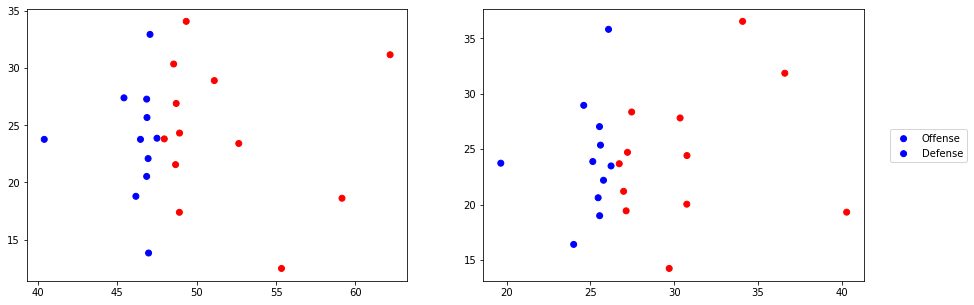

In [18]:
# sanity check
# both teams are going in the same direction in the 1st quarter
fig, axs = plt.subplots(1,2,figsize=(15, 5))

directionCheck = tracking[(tracking['gameId']==2022090800) & (tracking['playId']==101) & (tracking['frameId']==5)]
colors = {True:'blue',False:'red','football':'brown'}
axs[0].scatter(directionCheck['X_std'], directionCheck['Y_std'], c=directionCheck['isOnOffense'].map(colors))

directionCheck = tracking[(tracking['gameId']==2022090800) & (tracking['playId']==299) & (tracking['frameId']==1)]
colors = {True:'blue',False:'red','football':'brown'}
axs[1].scatter(directionCheck['X_std'], directionCheck['Y_std'], c=directionCheck['isOnOffense'].map(colors))

fig.legend(('Offense', 'Defense','Ball'),loc="right",bbox_to_anchor=(1, 0.5))
plt.show()

In [19]:
tracking[(tracking['gameId']==2022090800) & (tracking['playId']==101) & (tracking['frameId']==5)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,isOnOffense,ToLeft,X_std,Y_std
1200,2022090800,101,35472.0,Rodger Saffold,5,2022-09-08 20:25:08.599999,76.0,BUF,left,73.130000,27.65,0.00,0.25,0.01,274.95,1.03,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,True,True,46.870000,25.683333
1249,2022090800,101,38577.0,Bobby Wagner,5,2022-09-08 20:25:08.599999,45.0,LA,left,67.350000,29.92,0.06,0.05,0.03,70.42,37.25,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,False,True,52.650000,23.413333
1298,2022090800,101,41239.0,Aaron Donald,5,2022-09-08 20:25:08.599999,99.0,LA,left,71.290000,26.42,0.03,0.03,0.01,61.59,96.98,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,False,True,48.710000,26.913333
1347,2022090800,101,42392.0,Mitch Morse,5,2022-09-08 20:25:08.599999,60.0,BUF,left,72.500000,29.46,0.00,0.00,0.01,273.23,133.51,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,True,True,47.500000,23.873333
1396,2022090800,101,42816.0,Troy Hill,5,2022-09-08 20:25:08.599999,2.0,LA,left,64.660000,40.85,0.40,0.43,0.04,100.21,0.20,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,False,True,55.340000,12.483333
1445,2022090800,101,42818.0,Jake Kumerow,5,2022-09-08 20:25:08.599999,15.0,BUF,left,73.030000,39.50,0.00,0.00,0.00,272.24,48.99,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,True,True,46.970000,13.833333
1494,2022090800,101,43294.0,Jalen Ramsey,5,2022-09-08 20:25:08.599999,5.0,LA,left,68.890000,24.42,0.55,0.51,0.05,84.34,333.99,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,False,True,51.110000,28.913333
1543,2022090800,101,43298.0,Leonard Floyd,5,2022-09-08 20:25:08.599999,54.0,LA,left,71.090000,35.94,0.06,0.02,0.01,103.44,232.30,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.562363,NaN,NaN,NaN,NaN,False,True,48.910000,17.393333
1592,2022090800,101,43335.0,A'Shawn Robinson,5,2022-09-08 20:25:08.599999,94.0,LA,left,71.330000,31.77,0.02,0.02,0.01,101.06,305.32,NaN,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.01485,0.01485,2.12669,0.56236

In [20]:
tracking[(tracking['gameId']==2022090800) & (tracking['playId']==299) & (tracking['frameId']==5)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,isOnOffense,ToLeft,X_std,Y_std
6950,2022090800,299,34452.0,Matthew Stafford,5,2022-09-08 20:33:30.900000,9.0,LA,right,25.130000,23.88,0.02,0.60,0.01,93.51,274.48,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,True,False,25.130000,23.88
7003,2022090800,299,37075.0,Von Miller,5,2022-09-08 20:33:30.900000,40.0,BUF,right,27.450000,28.33,0.00,0.00,0.01,279.00,164.12,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,False,False,27.450000,28.33
7056,2022090800,299,40107.0,Micah Hyde,5,2022-09-08 20:33:30.900000,23.0,BUF,right,40.800000,20.22,3.24,2.43,0.31,313.74,30.31,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,False,False,40.800000,20.22
7109,2022090800,299,40166.0,Jordan Poyer,5,2022-09-08 20:33:30.900000,21.0,BUF,right,34.970000,32.71,5.18,2.17,0.51,267.35,300.74,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,False,False,34.970000,32.71
7162,2022090800,299,41290.0,Allen Robinson,5,2022-09-08 20:33:30.900000,1.0,LA,right,26.080000,35.81,0.00,0.00,0.00,96.45,50.89,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,True,False,26.080000,35.81
7215,2022090800,299,41341.0,DaQuan Jones,5,2022-09-08 20:33:30.900000,92.0,BUF,right,26.960000,21.20,0.02,0.46,0.01,288.62,293.13,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,False,False,26.960000,21.20
7268,2022090800,299,42400.0,Rob Havenstein,5,2022-09-08 20:33:30.900000,79.0,LA,right,25.470000,20.65,0.31,1.91,0.03,73.93,12.96,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,True,False,25.470000,20.65
7321,2022090800,299,43399.0,Tyler Higbee,5,2022-09-08 20:33:30.900000,89.0,LA,right,25.540000,18.99,0.00,0.00,0.00,45.94,95.71,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN,True,False,25.540000,18.99
7374,2022090800,299,44881.0,Cooper Kupp,5,2022-09-08 20:33:30.900000,10.0,LA,right,23.520000,18.81,6.69,1.50,0.66,353.76,349.30,NaN,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.26

In [21]:
plays[(plays['gameId']==2022090800) & ((plays['playId']==101) | (plays['playId']==299))]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
4872,2022090800,299,47853,Darrell Henderson,(9:52) D.Henderson up the middle to LA 22 for ...,1,1,10,LA,BUF,LA,17,9:52,0,7,NaN,NaN,NaN,5,5,N,27,SINGLEBACK,6.0,0.527559,0.269681,0.730319,0.000072,-0.000072,0.723416,-0.105841,NaN,NaN,NaN,NaN
7700,2022090800,101,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,13:54,0,0,NaN,NaN,NaN,7,7,N,72,I_FORM,6.0,0.631819,0.399819,0.600181,-0.014850,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN


In [22]:
# LOS must be 0
tracking['abs_x'] = tracking['X_std']-(tracking['yardlineNumber']+10)

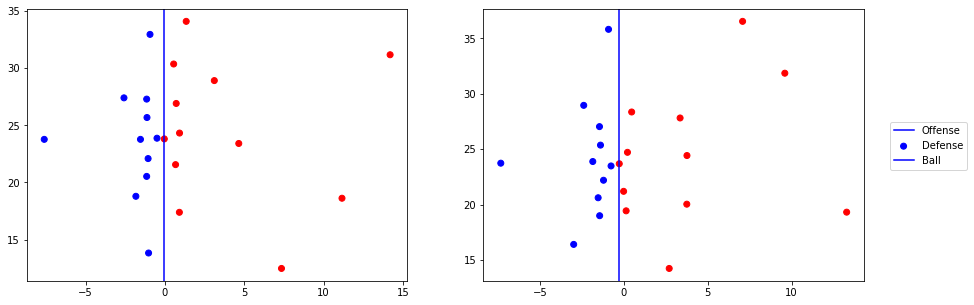

In [23]:
# sanity check
# LOS should be 0
fig, axs = plt.subplots(1,2,figsize=(15, 5))

directionCheck = tracking[(tracking['gameId']==2022090800) & (tracking['playId']==101) & (tracking['frameId']==5)]
colors = {True:'blue',False:'red','football':'brown'}
axs[0].scatter(directionCheck['abs_x'], directionCheck['Y_std'], c=directionCheck['isOnOffense'].map(colors))
axs[0].axvline(x = np.array(directionCheck[directionCheck['displayName']=='football']['abs_x'])[0], color = 'blue', label = 'axvline - full height')


directionCheck = tracking[(tracking['gameId']==2022090800) & (tracking['playId']==299) & (tracking['frameId']==1)]
colors = {True:'blue',False:'red','football':'brown'}
axs[1].scatter(directionCheck['abs_x'], directionCheck['Y_std'], c=directionCheck['isOnOffense'].map(colors))
axs[1].axvline(x = np.array(directionCheck[directionCheck['displayName']=='football']['abs_x'])[0], color = 'blue', label = 'axvline - full height')


fig.legend(('Offense', 'Defense','Ball'),loc="right",bbox_to_anchor=(1, 0.5))
plt.show()

https://www.kaggle.com/code/statsbymichaellopez/nfl-tracking-wrangling-voronoi-and-sonars

In [24]:
# standardize dir
tracking['dir_std'] = np.where((tracking['ToLeft']==True) & (tracking['dir'] < 90),
                             tracking['dir'] + 360,
                               tracking['dir'])

tracking['dir_std'] = np.where((tracking['ToLeft']==False) & (tracking['dir'] > 270),
                             tracking['dir'] - 360,
                               tracking['dir_std'])

tracking['dir_std'] = np.where((tracking['ToLeft']==True),
                             tracking['dir_std'] - 180,
                               tracking['dir_std'])

In [25]:
# standardize o
tracking['o_std'] = np.where((tracking['ToLeft']==True) & (tracking['o'] < 90),
                             tracking['o'] + 360,
                               tracking['o'])

tracking['o_std'] = np.where((tracking['ToLeft']==False) & (tracking['o'] > 270),
                             tracking['o'] - 360,
                               tracking['o_std'])

tracking['o_std'] = np.where((tracking['ToLeft']==True),
                             tracking['o_std'] - 180,
                               tracking['o_std'])

In [26]:
# write to csv to use later
tracking.to_csv("C:/Users/19012/Documents/BDB 2024/clean_tracking.csv")